In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import importlib
# import sys
# sys.path.append("visualization_files/")
# import results_graphs
# importlib.reload(results_graphs)

#in_folder = "../"
in_folder = ""

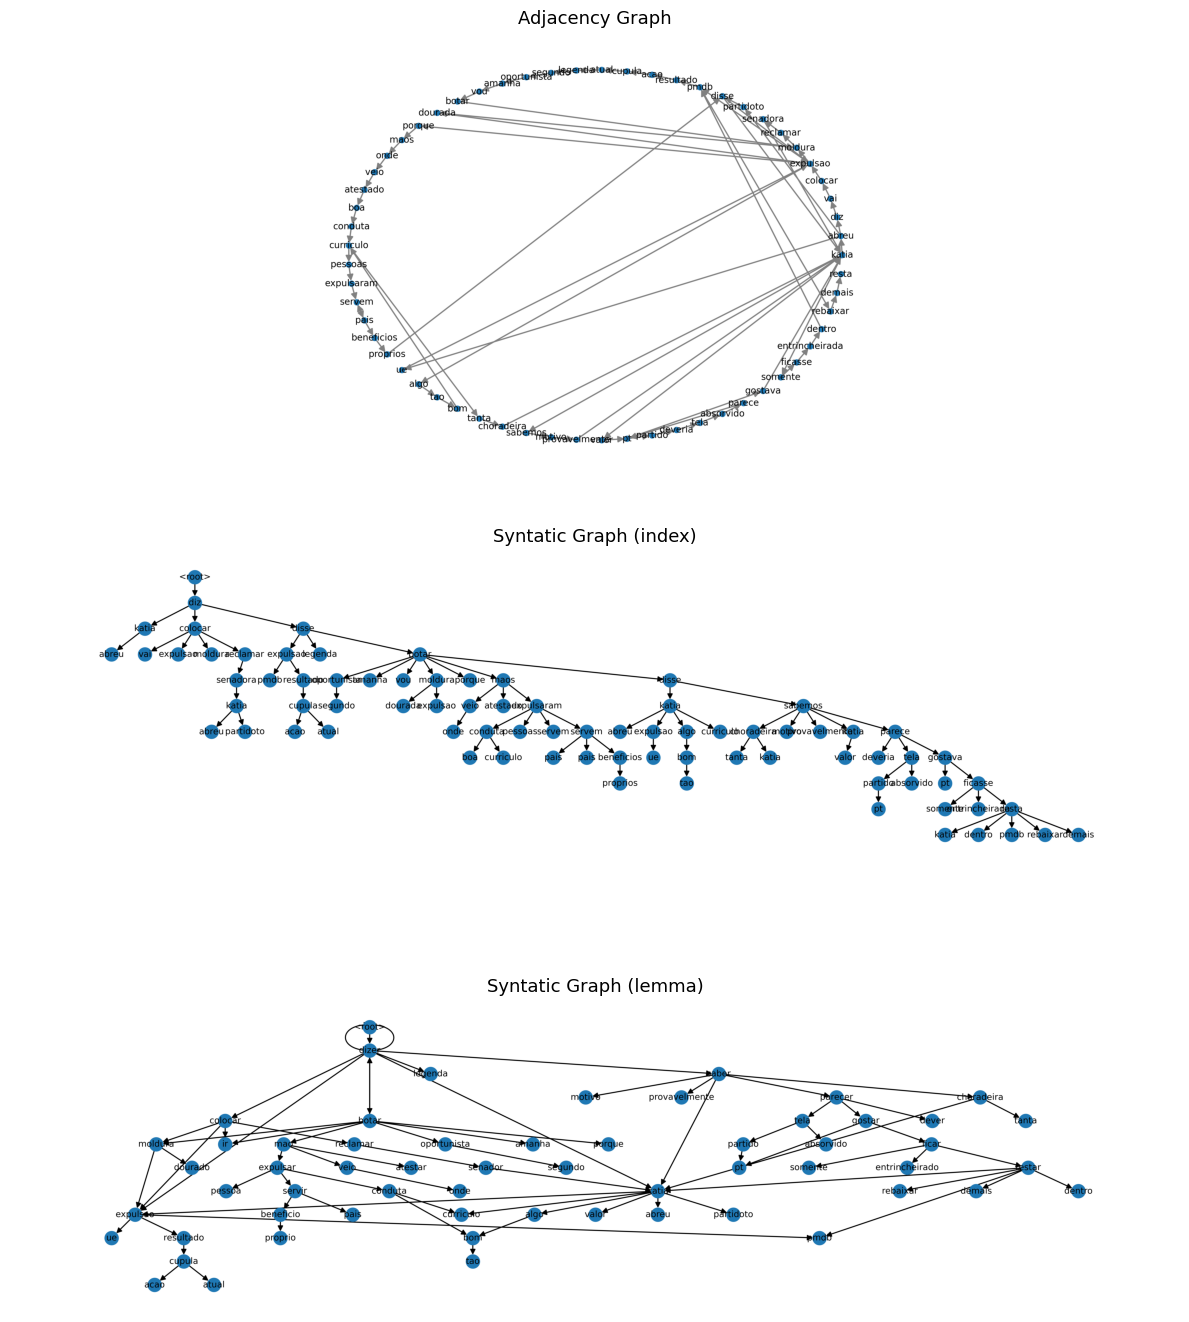

In [49]:
img_0 = plt.imread(in_folder + 'results/adjacency_graph.png')
img_1 = plt.imread(in_folder + 'results/syntatic_graph.png')
img_2 = plt.imread(in_folder + 'results/syntatic_graph_word.png')

images = [img_0, img_1, img_2]
images_titles = ['Adjacency Graph', 'Syntatic Graph (index)', 'Syntatic Graph (lemma)']


fig, axes = plt.subplots(3, 1, figsize=(12, 14))
axes.ravel()

for axes, img, img_title in zip(axes, images, images_titles):
    axes.imshow(img, )
    axes.set_title(img_title)
    #Change font size
    axes.title.set_size(13)
    axes.axis('off')

plt.tight_layout()
plt.show()


In [50]:
adjacency_max_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_adjacency_greater_max.csv", header=[0,1], index_col=0)
adjacency_mean_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_adjacency_greater_mean.csv", header=[0,1], index_col=0)

syntatic_max_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_syntatic_greater_max.csv", header=[0,1], index_col=0)
syntatic_mean_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_syntatic_greater_mean.csv", header=[0,1], index_col=0)

syntatic_word_max_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_syntatic_word_greater_max.csv", header=[0,1], index_col=0)
syntatic_word_mean_metrics_df = pd.read_csv(in_folder + "results/compare_metrics_syntatic_word_greater_mean.csv", header=[0,1], index_col=0)

In [51]:
def colors_from_values(values, palette_name):
    palette = sns.color_palette(palette_name, len(values))[::-1]
    return palette

def show_metrics(df_max, df_mean, graph, height=8):
    
    fig, axes = plt.subplots(2, 2, figsize=(12, height))
    axes = axes.ravel()

    dfs = [df_mean, df_max]
    modes = ["without stopwords", "with stopwords"]
    comparation = ["Mean", "Max"]

    i = 0
    for df_measure, comp in zip(dfs, comparation):
        for mode in modes:

            df = df_measure.sort_values(by=[(mode, "%")], key=lambda x: abs(x-0.5), ascending=False)

            sns.barplot(x=df[mode]["%"], y=df.index, orient="h", palette=colors_from_values(df[mode]["%"], "OrRd"), ax=axes[i])
            for container in axes[i].containers:
                axes[i].bar_label(container, label_type='edge', fmt='%1.2f', color='black', size=6)
            axes[i].set_title( graph + " - " + comp + " - "+ mode, size=9)
            axes[i].set_xlabel("true > fake (%)", size=10)
            axes[i].set_ylabel("Feature", size=10)
            axes[i].set_xlim([0, 1])
            i += 1

    plt.tight_layout()
    plt.show()

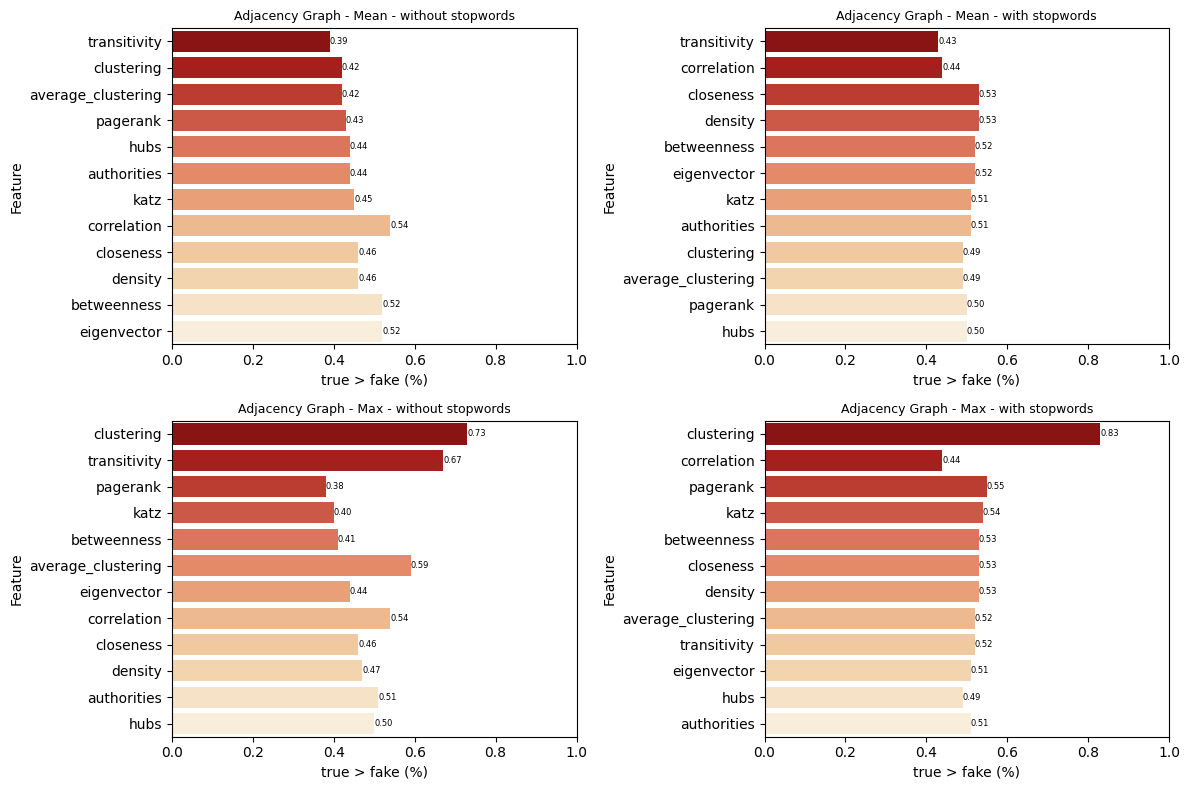

In [52]:
show_metrics(adjacency_max_metrics_df, adjacency_mean_metrics_df, "Adjacency Graph")

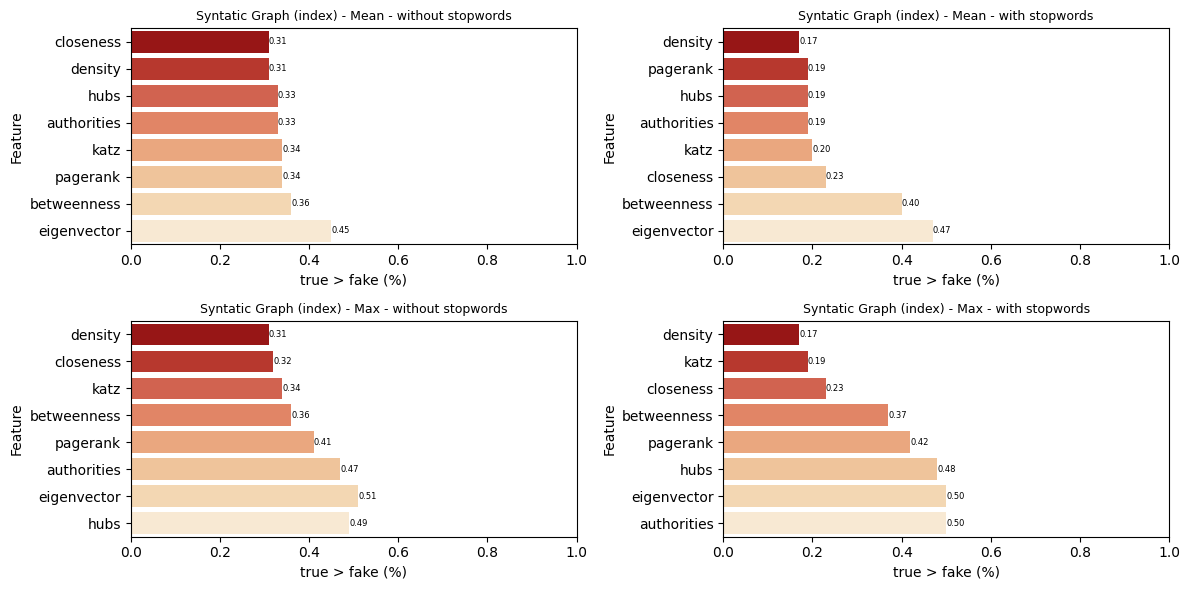

In [53]:
show_metrics(syntatic_max_metrics_df, syntatic_mean_metrics_df, "Syntatic Graph (index)", 6)

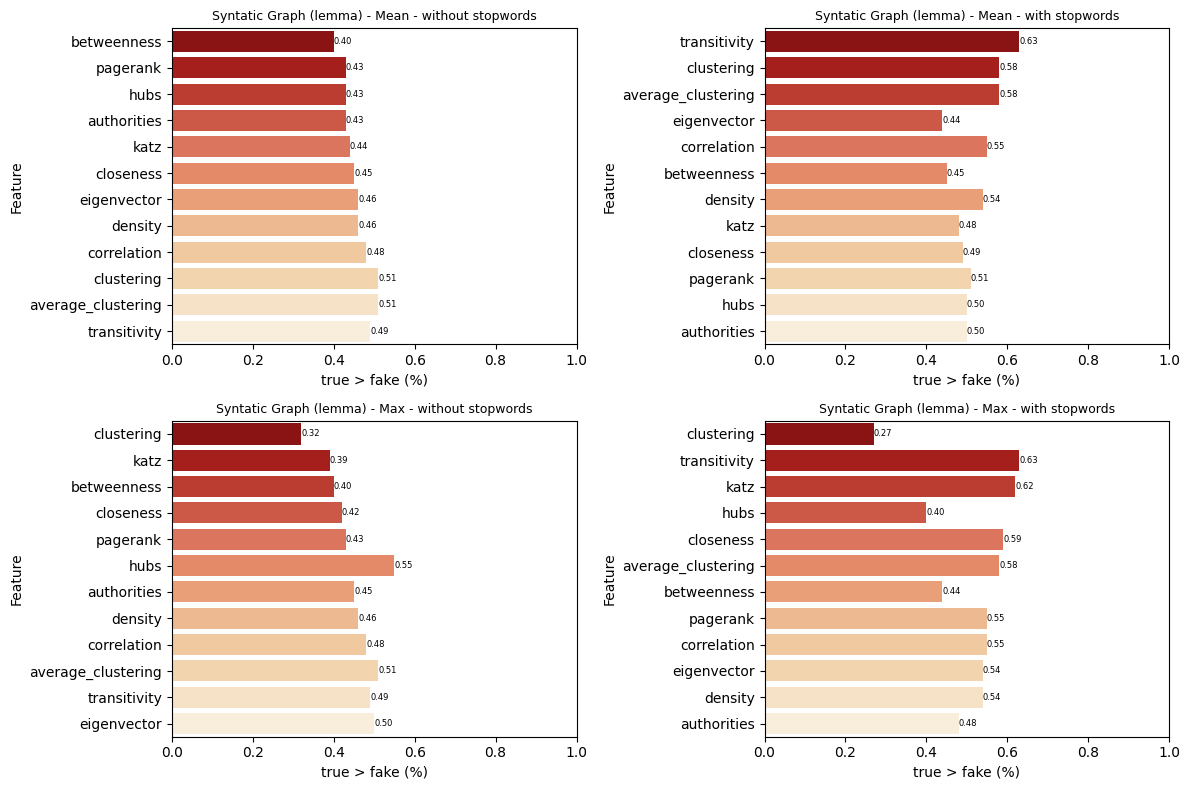

In [54]:
show_metrics(syntatic_word_max_metrics_df, syntatic_word_mean_metrics_df, "Syntatic Graph (lemma)")

In [55]:
def get_single_df(path):
    df = pd.read_csv(path, header=[0,1], index_col=[0,1])
    df.index.names = ['measure', 'algorithm']
    df = pd.DataFrame(df.values,\
                      columns=pd.MultiIndex.from_product([["with stopwords","without stopwords"], ['accuracy']]),\
                      index=df.index)
    df = df.loc[df.groupby(level=0).idxmax().values[:,1]]
    df = df.reset_index(level=1, drop=True)
    return df

In [56]:
get_single_df(in_folder + "results/compare_models_single_adjacency_max.csv")

,with stopwords,without stopwords
,accuracy,accuracy
measure,,
authorities,0.529444,0.533472
average_clustering,0.504306,0.504306
betweenness,0.564583,0.564583
closeness,0.532222,0.532222
clustering,0.499306,0.499306
correlation,0.534861,0.533611
density,0.522639,0.522639
eigenvector,0.541250,0.541806


In [57]:
adjacency_max_single_model_df = get_single_df(in_folder + "results/compare_models_single_adjacency_max.csv")
adjacency_mean_single_model_df = get_single_df(in_folder + "results/compare_models_single_adjacency_mean.csv")

syntatic_max_single_model_df = get_single_df(in_folder + "results/compare_models_single_syntatic_max.csv")
syntatic_mean_single_model_df = get_single_df(in_folder + "results/compare_models_single_syntatic_mean.csv")

syntatic_word_max_single_model_df = get_single_df(in_folder + "results/compare_models_single_syntatic_word_max.csv")
syntatic_word_mean_single_model_df = get_single_df(in_folder + "results/compare_models_single_syntatic_word_mean.csv")

In [58]:
adjacency_max_single_model_df.index = ["authorities - RF", 
                                       "average_clustering - KNN", 
                                       "betweenness - SVM", 
                                       "closeness - SVM",
                                       "clustering - KNN",
                                       "correlation - MLP",
                                       "density - DT",
                                       "eigenvector - SVM",
                                       "hubs - DT",
                                       "katz - SVM",
                                       "pagerank - SVM",
                                       "transitivity - MLP"]

adjacency_mean_single_model_df.index = ["authorities - SVM", 
                                       "average_clustering - KNN", 
                                       "betweenness - NB", 
                                       "closeness - SVM",
                                       "clustering - KNN",
                                       "correlation - MLP",
                                       "density - RF",
                                       "eigenvector - SVM",
                                       "hubs - RF",
                                       "katz - DT",
                                       "pagerank - SVM",
                                       "transitivity - RF"]
                                       

In [59]:
syntatic_max_single_model_df.index = ["authorities - RF",  
                                       "betweenness - SVM", 
                                       "closeness - DT",
                                       "density - RF",
                                       "eigenvector - KNN",
                                       "hubs - RF",
                                       "katz - KNN",
                                       "pagerank - MLP"]

syntatic_mean_single_model_df.index = ["authorities - RF",  
                                       "betweenness - SVM", 
                                       "closeness - SVM",
                                       "density - DT",
                                       "eigenvector - SVM",
                                       "hubs - RF",
                                       "katz - KNN",
                                       "pagerank - DT"]

In [60]:
syntatic_word_max_single_model_df.index = ["authorities - MLP", 
                                            "average_clustering - SVM", 
                                            "betweenness - SVM", 
                                            "closeness - SVM",
                                            "clustering - SVM",
                                            "correlation - KNN",
                                            "density - RF",
                                            "eigenvector - SVM",
                                            "hubs - MLP",
                                            "katz - SVM",
                                            "pagerank - SVM",
                                            "transitivity - SVM"]

syntatic_word_mean_single_model_df.index = ["authorities - NB", 
                                            "average_clustering - SVM", 
                                            "betweenness - SVM", 
                                            "closeness - SVM",
                                            "clustering - SVM",
                                            "correlation - KNN",
                                            "density - DT",
                                            "eigenvector - SVM",
                                            "hubs - NB",
                                            "katz - KNN",
                                            "pagerank - SVM",
                                            "transitivity - SVM"]

In [61]:
def colors_from_values(values, palette_name):
    palette = sns.color_palette(palette_name, len(values))[::-1]
    return palette

def show_model_single(df_max, df_mean, graph, height=8):
    
    fig, axes = plt.subplots(2, 2, figsize=(12, height))
    axes = axes.ravel()

    dfs = [df_mean, df_max]
    modes = ["without stopwords", "with stopwords"]
    comparation = ["Mean", "Max"]

    i = 0
    for df_measure, comp in zip(dfs, comparation):
        for mode in modes:

            df = df_measure.sort_values(by=[(mode, "accuracy")], key=lambda x: abs(x-0.5), ascending=False)

            sns.barplot(x=df[mode]["accuracy"], y=df.index, orient="h", palette=colors_from_values(df[mode]["accuracy"], "OrRd"), ax=axes[i])
            for container in axes[i].containers:
                axes[i].bar_label(container, label_type='edge', fmt='%1.2f', color='black', size=6)
            axes[i].set_title( graph + " - " + comp + " - "+ mode, size=9)
            axes[i].set_xlabel("Accuracy", size=10)
            axes[i].set_ylabel("Feature", size=10)
            axes[i].set_xlim([0, 1])
            i += 1

    plt.tight_layout()
    plt.show()

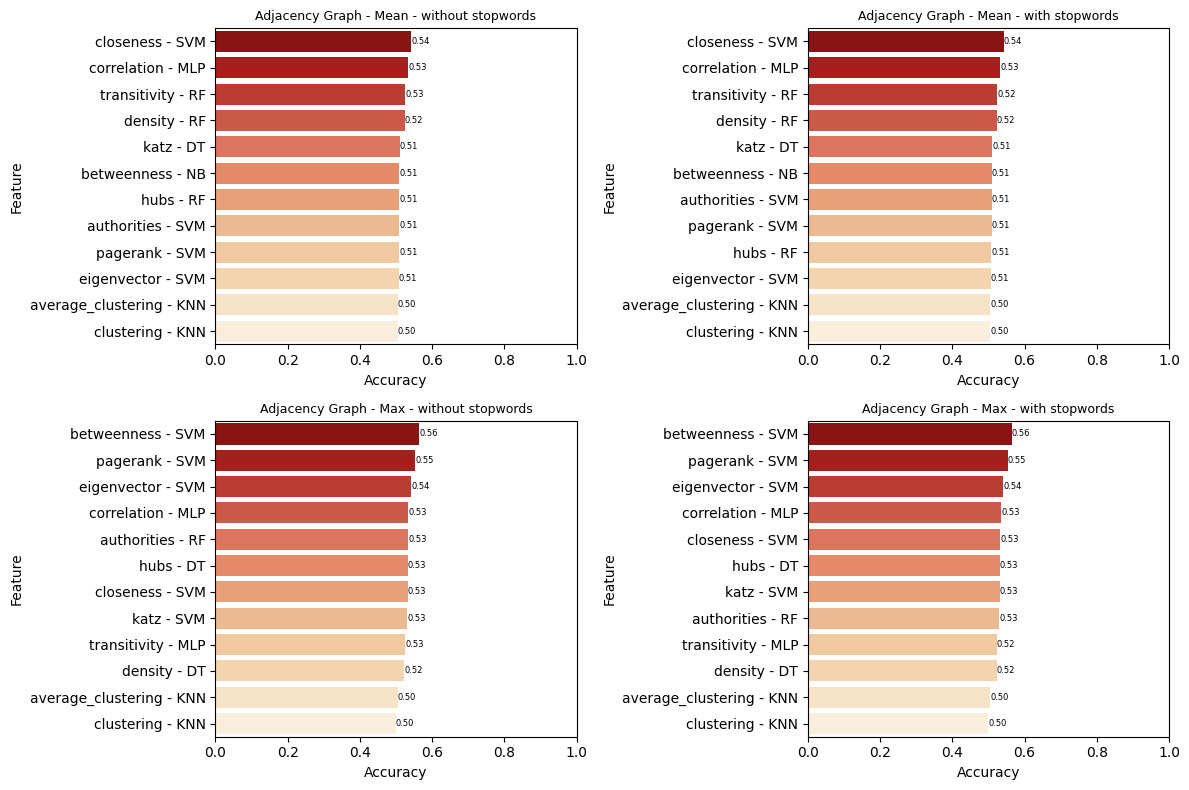

In [62]:
show_model_single(adjacency_max_single_model_df, adjacency_mean_single_model_df, "Adjacency Graph")

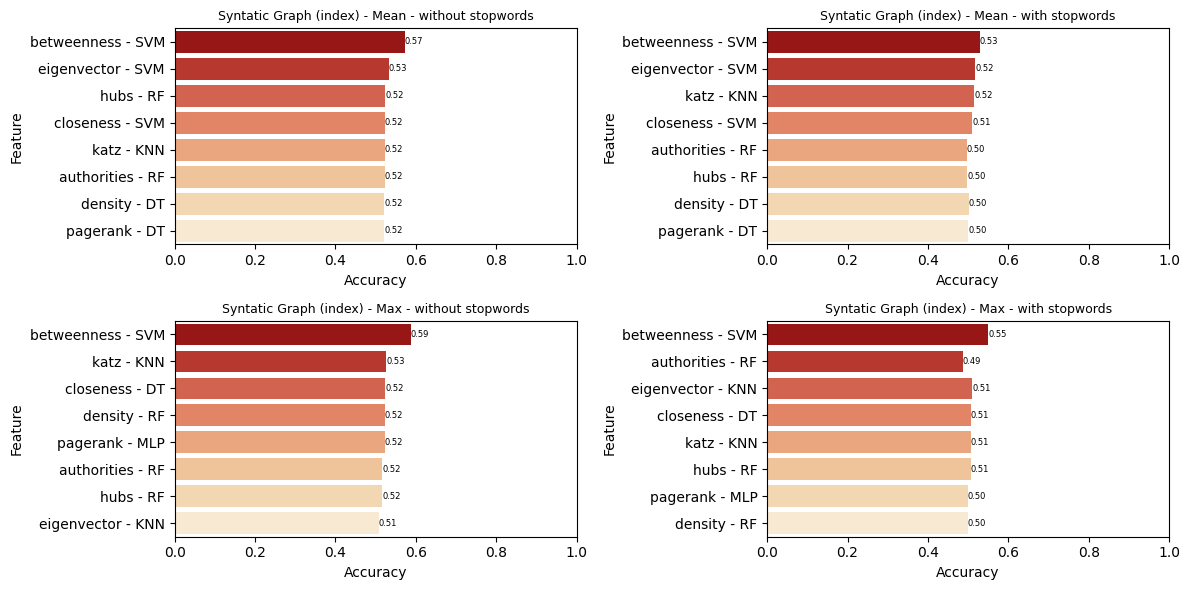

In [63]:
show_model_single(syntatic_max_single_model_df, syntatic_mean_single_model_df, "Syntatic Graph (index)", 6)

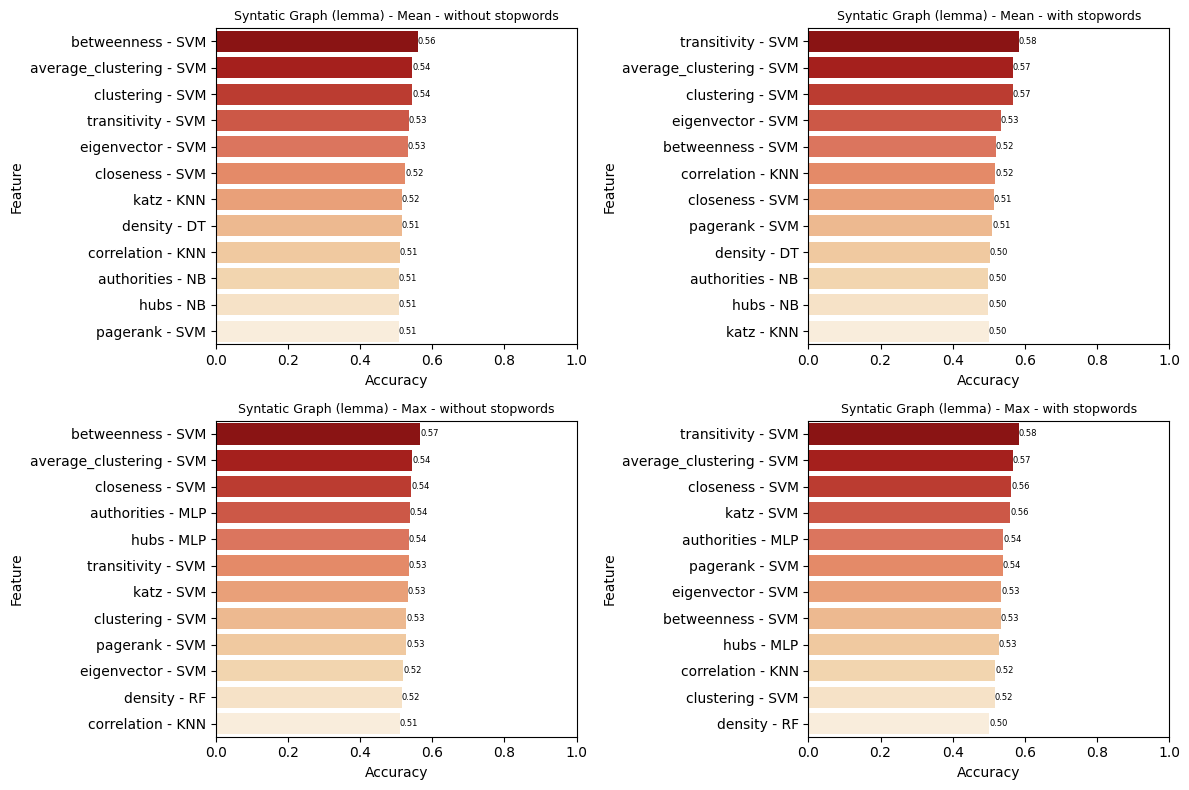

In [64]:
show_model_single(syntatic_word_max_single_model_df, syntatic_word_mean_single_model_df, "Syntatic Graph (lemma)")

## Betweneess (Syntatic Graph - (index))

In [65]:
import os

file_path_without_stopwords = os.path.join('csvs', 'syntatic_max_measures.csv')
df = pd.read_csv(file_path_without_stopwords)
df.groupby('label').describe()["betweenness"].style.format("{:.4f}")

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
fake,3600.0000,0.0296,0.0220,0.0000,0.0143,0.0244,0.0384,0.2910
true,3600.0000,0.0236,0.0202,0.0023,0.0116,0.0179,0.0286,0.3000


In [66]:
def get_all_df(path):
    df = pd.read_csv(path, header=[0,1], index_col=0)
    return df

In [67]:
adjacency_max_all_model_df = get_all_df(in_folder + "results/compare_models_all_adjacency_max.csv")
adjacency_mean_all_model_df = get_all_df(in_folder + "results/compare_models_all_adjacency_mean.csv")

syntatic_max_all_model_df = get_all_df(in_folder + "results/compare_models_all_syntatic_max.csv")
syntatic_mean_all_model_df = get_all_df(in_folder + "results/compare_models_all_syntatic_mean.csv")

syntatic_word_max_all_model_df = get_all_df(in_folder + "results/compare_models_all_syntatic_word_max.csv")
syntatic_word_mean_all_model_df = get_all_df(in_folder + "results/compare_models_all_syntatic_word_mean.csv")

In [68]:
def colors_from_values(values, palette_name):
    palette = sns.color_palette(palette_name, len(values))[::-1]
    return palette

def show_model_all(df_max, df_mean, graph, height=5):
    
    fig, axes = plt.subplots(2, 2, figsize=(9, height))
    axes = axes.ravel()

    dfs = [df_mean, df_max]
    modes = ["without stopwords", "with stopwords"]
    comparation = ["Mean", "Max"]

    i = 0
    for df_measure, comp in zip(dfs, comparation):
        for mode in modes:

            df = df_measure.sort_values(by=[(mode, "accuracy")], key=lambda x: abs(x-0.5), ascending=False)

            sns.barplot(x=df[mode]["accuracy"], y=df.index, orient="h", palette=colors_from_values(df[mode]["accuracy"], "OrRd"), ax=axes[i])
            for container in axes[i].containers:
                axes[i].bar_label(container, label_type='edge', fmt='%1.2f', color='black', size=6)
            axes[i].set_title( graph + " - " + comp + " - "+ mode, size=9)
            axes[i].set_xlabel("Accuracy", size=10)
            axes[i].set_ylabel("Model", size=10)
            axes[i].set_xlim([0, 1])
            i += 1

    plt.tight_layout()
    plt.show()

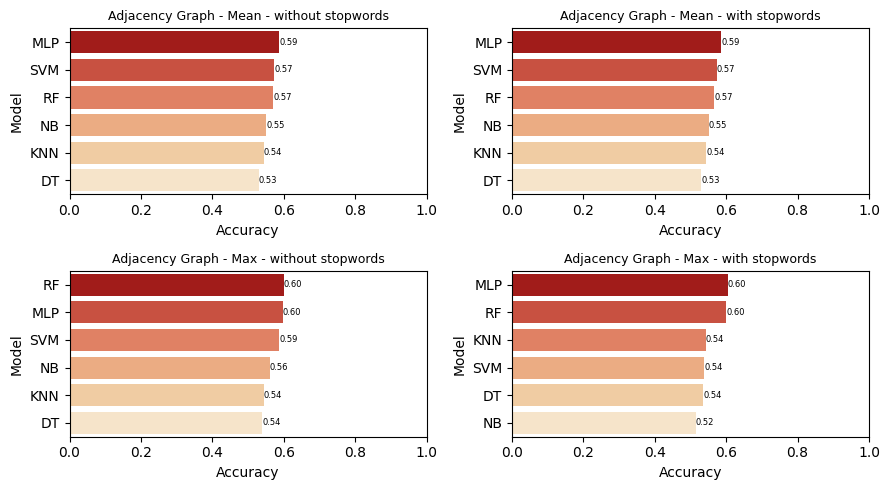

In [69]:
show_model_all(adjacency_max_all_model_df, adjacency_mean_all_model_df, "Adjacency Graph")

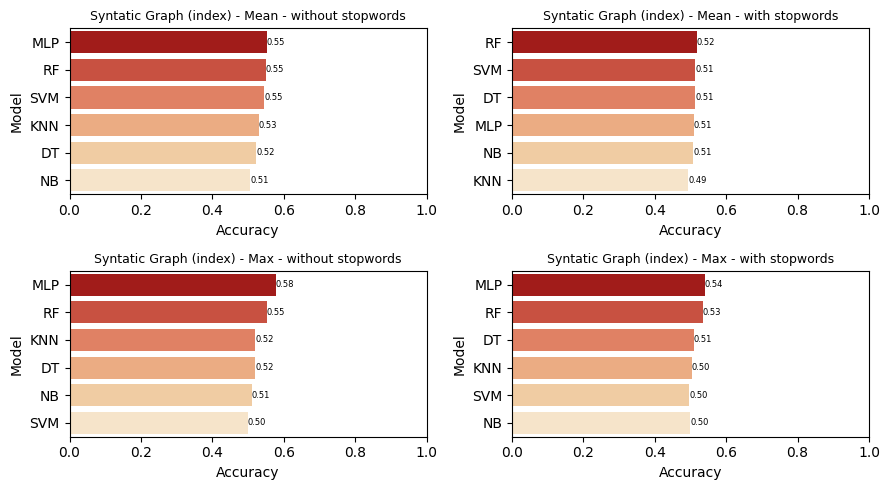

In [70]:
show_model_all(syntatic_max_all_model_df, syntatic_mean_all_model_df, "Syntatic Graph (index)")

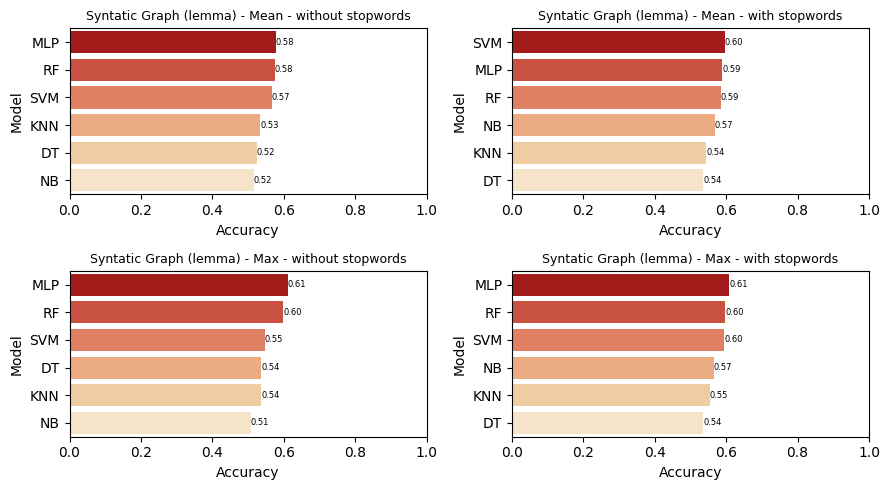

In [71]:
show_model_all(syntatic_word_max_all_model_df, syntatic_word_mean_all_model_df, "Syntatic Graph (lemma)")